In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
# 加载训练数据集
tds = np.loadtxt('dataset_一元线性回归.csv', delimiter=',', dtype='int', skiprows=1)
tds_x = tds[:,0]
tds_y = tds[:,1]
tds_x_mean = tds_x.mean()
tds_x_std = tds_x.std()
# 标准化

std_tds_x = (tds_x - tds_x_mean) / tds_x_std
std_tds_x

array([ 1.39433428,  1.11069026,  0.09554325, -1.59139223, -0.8449606 ,
        0.93154667, -1.38239138, -1.74067856,  0.46875906,  0.73747445,
       -0.11345761, -0.63595975, -0.36724436, -0.44188752,  0.3045441 ,
        1.94669369,  0.25975821,  0.25975821, -1.23310505,  0.84197488])

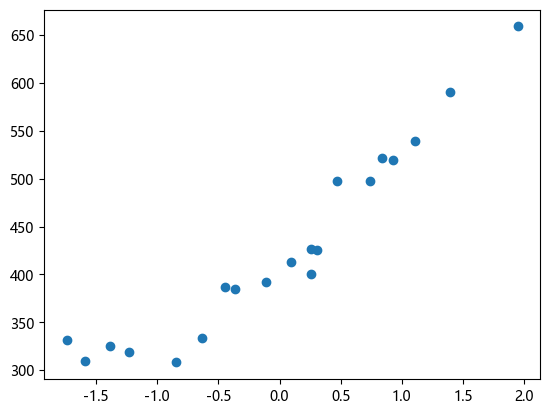

In [3]:
# 适用训练数据集绘制散点图看数据分布
plt.scatter(std_tds_x, tds_y)

In [4]:
# 拟合直线函数
def f(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# 成本函数
def J(theta_0, theta_1, tds_x, tds_y):
    m = len(tds_x)
    return np.sum(np.power(f(theta_0, theta_1, tds_x) - tds_y, 2)) / 2 / m

# 下面两个是偏导数
def pd_theta_0(theta_0, theta_1, tds_x, tds_y):
    m = len(tds_x)
    return np.sum(f(theta_0, theta_1, tds_x) - tds_y) / m

def pd_theta_1(theta_0, theta_1, tds_x, tds_y):
    m = len(tds_x)
    return np.sum((f(theta_0, theta_1, tds_x) - tds_y) * tds_x) / m

In [5]:
eta = 5e-2
theta_0 = theta_1 = 0
lst_iter_cnt = []
lst_cost = []
for i in range(200):
    tmp_theta_0 = theta_0 - eta * pd_theta_0(theta_0, theta_1, std_tds_x, tds_y)
    tmp_theta_1 = theta_1 - eta * pd_theta_1(theta_0, theta_1, std_tds_x, tds_y)
    
    theta_0 = tmp_theta_0
    theta_1 = tmp_theta_1
    
    lst_iter_cnt.append(i)
    lst_cost.append(J(theta_0, theta_1, std_tds_x, tds_y))
    print(i, theta_0, theta_1, i, lst_cost[i])

0 21.4575 4.673938396017071 0 87526.90987559463
1 41.842124999999996 9.114179872233288 1 79039.56060081879
2 61.207518750000006 13.332409274638694 2 71379.72788033358
3 79.6046428125 17.33972720692383 3 64466.72885009569
4 97.08191067187501 21.146679242594708 4 58227.74722530598
5 113.68531513828125 24.763283676482043 5 52597.066308933274
6 129.4585493813672 28.19905788867501 6 47515.37678190692
7 144.44312191229884 31.46304339025833 7 42929.151983765616
8 158.67846581668388 34.56382961676248 8 38790.08410344309
9 172.2020425258497 37.50957653194143 9 35054.57534145202
10 185.0494403995572 40.308036101361424 10 31683.27868375509
11 197.25446837957935 42.96657269231042 11 28640.683450183587
12 208.84924496060037 45.49218245371197 12 25894.74125188532
13 219.86428271257034 47.89151172704344 13 23416.528417921138
14 230.32856857694182 50.17087453670833 14 21179.941335268453
15 240.26964014809474 52.336269205889984 15 19161.421493174403
16 249.71365814069 54.39339414161255 16 17339.7073356

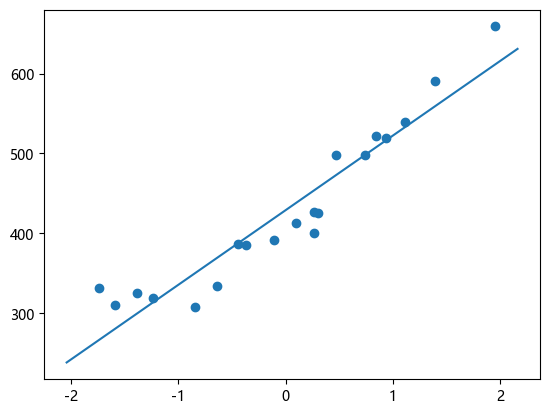

In [6]:
plt.scatter(std_tds_x, tds_y)
x = np.arange(np.min(std_tds_x)-0.3, np.max(std_tds_x)+0.3, 0.1)
y = f(theta_0, theta_1, x)
plt.plot(x, y)

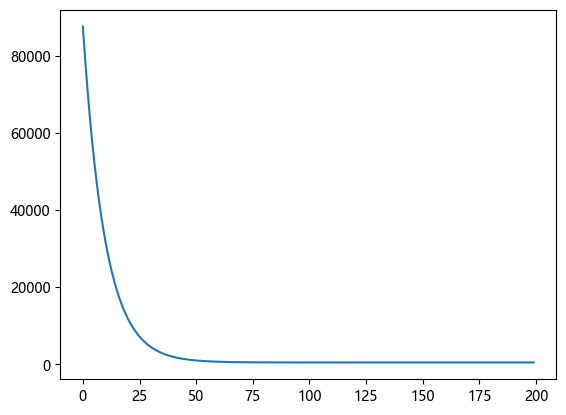

In [7]:
plt.plot(lst_iter_cnt, lst_cost)

In [8]:
# 既然知道程序肯定是收敛的，那么接下去，我们就不指定循环次数了，只是判断前后两次成本函数的误差
eta = 5e-2
theta_0 = theta_1 = 0
lst_iter_cnt = []
lst_cost = []
j_cost_cur = J(theta_0, theta_1, std_tds_x, tds_y)
diff = 1e-8
i = 0
while True:
    j_cost_pre = j_cost_cur
    tmp_theta_0 = theta_0 - eta * pd_theta_0(theta_0, theta_1, std_tds_x, tds_y)
    tmp_theta_1 = theta_1 - eta * pd_theta_1(theta_0, theta_1, std_tds_x, tds_y)
    
    theta_0 = tmp_theta_0
    theta_1 = tmp_theta_1
    
    j_cost_cur = J(theta_0, theta_1, std_tds_x, tds_y)
    
    lst_iter_cnt.append(i)
    
    lst_cost.append(j_cost_cur)
    if (j_cost_pre - j_cost_cur) < diff:
        break
    i += 1

In [9]:
# 以下的公式推导可自行思考
theta_0_not_scaled = theta_0 - theta_1 * tds_x.mean() / tds_x.std()
theta_1_not_scaled = theta_1 / tds_x.std()
print(theta_0_not_scaled, theta_1_not_scaled)

def f_not_scaled(x):
    return theta_0_not_scaled + theta_1_not_scaled * x

print("x为198时，y的预测值：", f_not_scaled(198))

231.54553457360393 1.3955088311372241
x为198时，y的预测值： 507.8562831387743


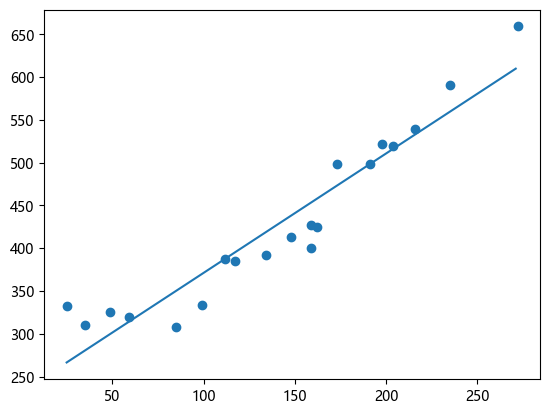

In [10]:
plt.scatter(tds_x, tds_y)
x = np.arange(np.min(tds_x), np.max(tds_x), 1)


y = f_not_scaled(x)

plt.plot(x, y)